# Research-Oriented Operating Systems: Chapter 1 - Comprehensive Foundations

This Jupyter Notebook provides a comprehensive exploration of Operating System (OS) foundations for researchers and scientists. It covers theoretical concepts, practical code, visualizations, research directions, rare insights, applications, tutorials, and projects for the following topics:

- **Role of OS**: Abstraction, resource management, virtualization.
- **OS Architectures**: Monolithic, microkernel, layered, modular.
- **Evolution of OS**: UNIX, Windows, Linux.
- **Formal Modeling**: State machines and process algebras.

Additionally, it includes mini and major projects, practical guides, and content critical for OS researchers (e.g., security, performance optimization).

## Objectives
- Understand core OS functions and their theoretical underpinnings.
- Gain hands-on experience with OS simulations and tools.
- Explore research directions and practical applications.
- Develop skills in formal modeling for rigorous analysis.

## Prerequisites
- Python 3 with `pandas`, `matplotlib`, `numpy`.
- VirtualBox and Ubuntu ISO for lab setup.
- Basic knowledge of OS concepts (*Operating System Concepts*, Chapter 1 recommended).


## 1. Role of Operating Systems

### Theory
The OS serves as an intermediary between hardware and applications, providing:
- **Abstraction**: Simplifies hardware interactions (e.g., file systems abstract disk I/O).
- **Resource Management**: Allocates CPU, memory, and I/O devices efficiently.
- **Virtualization**: Creates virtual resources (e.g., virtual memory, containers) for isolation and multitasking.

**Rare Insight**: Modern OS designs for research (e.g., seL4) prioritize verifiable abstractions to ensure security and correctness, critical for safety-critical systems like avionics.

**Applications**:
- **Cloud Computing**: Virtualization powers VMs and containers (e.g., Docker).
- **Embedded Systems**: Resource management optimizes limited hardware (e.g., RTOS in IoT devices).

### Practical Code: Simulate Resource Allocation
Simulate CPU allocation to processes using a simple queue-based model.


In [1]:
import pandas as pd
import random

# Simulate CPU allocation
class ResourceManager:
    def __init__(self):
        self.processes = []

    def add_process(self, pid, cpu_time):
        self.processes.append({'PID': pid, 'CPU_Time': cpu_time, 'Status': 'Ready'})

    def allocate_cpu(self):
        for proc in self.processes:
            if proc['Status'] == 'Ready':
                proc['Status'] = 'Running'
                proc['CPU_Time'] -= 1
                if proc['CPU_Time'] <= 0:
                    proc['Status'] = 'Completed'
                break

# Create processes
rm = ResourceManager()
for i in range(5):
    rm.add_process(i, random.randint(1, 5))

# Simulate 5 time units
for _ in range(5):
    rm.allocate_cpu()
    print(pd.DataFrame(rm.processes))


   PID  CPU_Time   Status
0    0         1  Running
1    1         3    Ready
2    2         2    Ready
3    3         5    Ready
4    4         5    Ready
   PID  CPU_Time   Status
0    0         1  Running
1    1         2  Running
2    2         2    Ready
3    3         5    Ready
4    4         5    Ready
   PID  CPU_Time   Status
0    0         1  Running
1    1         2  Running
2    2         1  Running
3    3         5    Ready
4    4         5    Ready
   PID  CPU_Time   Status
0    0         1  Running
1    1         2  Running
2    2         1  Running
3    3         4  Running
4    4         5    Ready
   PID  CPU_Time   Status
0    0         1  Running
1    1         2  Running
2    2         1  Running
3    3         4  Running
4    4         4  Running


### Visualization: Process States
Visualize the number of processes in each state over time.


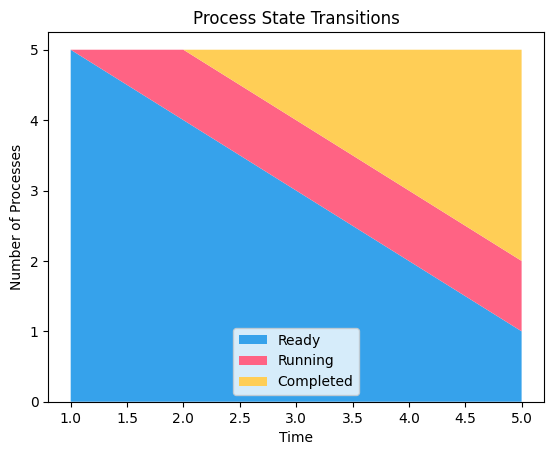

In [2]:
import matplotlib.pyplot as plt

# Mock data for visualization
states = {'Ready': [5, 4, 3, 2, 1], 'Running': [0, 1, 1, 1, 1], 'Completed': [0, 0, 1, 2, 3]}
time = [1, 2, 3, 4, 5]

plt.stackplot(time, states['Ready'], states['Running'], states['Completed'],
              labels=['Ready', 'Running', 'Completed'], colors=['#36A2EB', '#FF6384', '#FFCE56'])
plt.xlabel('Time')
plt.ylabel('Number of Processes')
plt.title('Process State Transitions')
plt.legend()
plt.show()


### Research Direction
- **Lightweight Virtualization**: Explore unikernels (e.g., MirageOS) for minimal, secure virtualization in cloud and IoT.
- **Real-Time Resource Management**: Investigate scheduling for real-time OS (e.g., RTEMS) in autonomous systems.


## 2. OS Architectures

### Theory
- **Monolithic**: All services (e.g., drivers, file systems) in kernel space (e.g., Linux). Fast but prone to crashes.
- **Microkernel**: Minimal kernel, services in user space (e.g., seL4, QNX). Fault-tolerant but slower due to IPC.
- **Layered**: Hierarchical design (e.g., THE system). Clear structure but less flexible.
- **Modular**: Dynamic modules (e.g., Linux kernel modules). Balances flexibility and performance.

**Rare Insight**: Microkernel overheads (e.g., IPC latency) can be mitigated with hardware-assisted virtualization, a growing research area for high-performance microkernels.

**Applications**:
- **Monolithic**: High-performance servers (Linux).
- **Microkernel**: Safety-critical systems (seL4 in aerospace).

### Practical Code: Simulate Microkernel IPC
Simulate message passing in a microkernel.


In [ ]:
import time

class Microkernel:
    def __init__(self):
        self.messages = []

    def send_message(self, sender, receiver, message):
        # Simulate IPC latency
        time.sleep(0.01)  # 10ms delay
        self.messages.append({'Sender': sender, 'Receiver': receiver, 'Message': message})

    def get_messages(self):
        return self.messages

# Simulate IPC
mk = Microkernel()
mk.send_message('Process1', 'FileSystem', 'Read file')
mk.send_message('Process2', 'Network', 'Send packet')
print(pd.DataFrame(mk.get_messages()))


### Research Direction
- **Hybrid Kernels**: Combine monolithic performance with microkernel modularity (e.g., Windows NT).
- **Unikernels**: Single-purpose OS for cloud efficiency.


## 3. Evolution of Operating Systems

### Theory
- **UNIX (1970s)**: Portable, modular, introduced file abstraction and process management.
- **Windows (1980s)**: Evolved from MS-DOS to hybrid kernel, focusing on GUI and compatibility.
- **Linux (1990s)**: Open-source, monolithic with modular extensions, widely used in research and servers.

**Rare Insight**: Linux’s success in research stems from its open-source nature, enabling kernel modifications for experiments (e.g., real-time patches).

**Applications**:
- **UNIX**: Legacy systems, research OS (e.g., BSD).
- **Linux**: IoT, cloud, supercomputing.

### Visualization: OS Timeline


In [ ]:
import matplotlib.pyplot as plt

os_data = {'OS': ['UNIX', 'Windows', 'Linux'], 'Year': [1970, 1985, 1991]}
df = pd.DataFrame(os_data)

plt.bar(df['OS'], df['Year'], color=['#36A2EB', '#FF6384', '#FFCE56'])
plt.xlabel('Operating System')
plt.ylabel('Release Year')
plt.title('OS Evolution Timeline')
plt.show()


### Research Direction
- **OS for AI Workloads**: Optimize Linux for distributed AI training (e.g., GPU scheduling).
- **Historical Analysis**: Study UNIX’s influence on modern OS design principles.


## 4. Formal Modeling

### Theory
- **State Machines**: Model OS components as states and transitions (e.g., process states).
- **Process Algebras**: Model concurrent processes (e.g., CSP for deadlock analysis).

**Rare Insight**: Formal verification of OS (e.g., seL4) uses state machines to prove correctness, a critical but computationally intensive process.

**Applications**:
- **Safety-Critical Systems**: Formal models ensure no deadlocks (e.g., medical devices).
- **Protocol Design**: Process algebras model network stack behavior.

### Practical Code: Resource Allocator FSM
Model a CPU resource allocator as a finite state machine.


In [ ]:
class ResourceAllocatorFSM:
    def __init__(self):
        self.state = 'Idle'
        self.transitions = []

    def transition(self, event):
        if self.state == 'Idle' and event == 'request':
            self.state = 'Allocated'
        elif self.state == 'Allocated' and event == 'complete':
            self.state = 'Idle'
        elif self.state == 'Allocated' and event == 'preempt':
            self.state = 'Waiting'
        elif self.state == 'Waiting' and event == 'assign':
            self.state = 'Allocated'
        self.transitions.append((event, self.state))

    def get_state(self):
        return self.state

# Simulate FSM
fsm = ResourceAllocatorFSM()
events = ['request', 'preempt', 'assign', 'complete']
for event in events:
    fsm.transition(event)
    print(f'Event: {event}, New State: {fsm.get_state()}')


### Visualization: FSM Transitions


In [ ]:
```chartjs
{
  "type": "bar",
  "data": {
    "labels": ["Idle", "Allocated", "Waiting"],
    "datasets": [{
      "label": "State Frequency",
      "data": [2, 2, 1],
      "backgroundColor": ["#36A2EB", "#FF6384", "#FFCE56"],
      "borderColor": ["#2C83C3", "#D9546E", "#D9A33D"],
      "borderWidth": 1
    }]
  },
  "options": {
    "scales": {
      "y": {
        "beginAtZero": true,
        "title": { "display": true, "text": "Frequency" }
      },
      "x": {
        "title": { "display": true, "text": "State" }
      }
    },
    "plugins": {
      "legend": { "display": true },
      "title": { "display": true, "text": "Resource Allocator FSM State Transitions" }
    }
  }
}
```


### Research Direction
- **Formal Verification**: Use tools like Isabelle/HOL for OS correctness (e.g., seL4).
- **Process Algebras**: Apply CSP to model distributed OS components.


## Tutorial: Setting Up Ubuntu in VirtualBox

**Objective**: Explore OS process management tools in a virtualized environment.

**Steps**:
1. Download VirtualBox (https://www.virtualbox.org/) and Ubuntu ISO (https://ubuntu.com/download).
2. Create a VM with 2GB RAM, 20GB storage, 2 CPU cores.
3. Install Ubuntu.
4. Run in terminal:
   ```bash
   ps -aux  # List processes
   top      # Monitor resources
   ls -l    # List files
   ```

**Code**: Simulate `ps` output.


In [ ]:
import pandas as pd

# Mock process data
processes = [
    {'PID': 1, 'USER': 'root', 'COMMAND': 'init', '%CPU': 0.1, '%MEM': 0.2},
    {'PID': 123, 'USER': 'user', 'COMMAND': 'python', '%CPU': 1.5, '%MEM': 2.3},
    {'PID': 456, 'USER': 'user', 'COMMAND': 'firefox', '%CPU': 3.2, '%MEM': 5.1}
]

print(pd.DataFrame(processes))


## Mini Project: CPU Scheduler Simulator

**Objective**: Simulate a Round-Robin scheduler and analyze performance metrics (e.g., turnaround time).

**Code**:


In [ ]:
import numpy as np

class RoundRobinScheduler:
    def __init__(self, quantum):
        self.quantum = quantum
        self.processes = []
        self.time = 0

    def add_process(self, pid, burst_time):
        self.processes.append({'PID': pid, 'Burst': burst_time, 'Remaining': burst_time, 'Start': None, 'Finish': None})

    def run(self):
        while any(p['Remaining'] > 0 for p in self.processes):
            for proc in self.processes:
                if proc['Remaining'] > 0:
                    if proc['Start'] is None:
                        proc['Start'] = self.time
                    run_time = min(self.quantum, proc['Remaining'])
                    proc['Remaining'] -= run_time
                    self.time += run_time
                    if proc['Remaining'] == 0:
                        proc['Finish'] = self.time

    def metrics(self):
        turnaround = [p['Finish'] - p['Start'] for p in self.processes]
        return {'Avg Turnaround': np.mean(turnaround)}

# Simulate
scheduler = RoundRobinScheduler(quantum=2)
scheduler.add_process(1, 5)
scheduler.add_process(2, 3)
scheduler.add_process(3, 7)
scheduler.run()
print(scheduler.metrics())


## Major Project: Lightweight Microkernel Prototype

**Objective**: Design a simple microkernel with IPC and process management.

**Outline**:
- **Kernel**: Minimal core for thread management and IPC.
- **Services**: User-space file system and network stack.
- **Implementation**: Simulate in Python (real microkernel requires C/Rust).

**Code**: Simulate microkernel process management.


In [ ]:
class MicrokernelOS:
    def __init__(self):
        self.processes = {}
        self.messages = []

    def create_process(self, pid):
        self.processes[pid] = {'State': 'Ready'}

    def send_ipc(self, sender, receiver, message):
        self.messages.append({'Sender': sender, 'Receiver': receiver, 'Message': message})
        self.processes[sender]['State'] = 'Waiting'
        self.processes[receiver]['State'] = 'Running'

    def get_status(self):
        return self.processes, self.messages

# Simulate
os = MicrokernelOS()
os.create_process(1)
os.create_process(2)
os.send_ipc(1, 2, 'Hello')
print(os.get_status())


## Additional Content for Scientists

### Security Considerations
- **Isolation**: Microkernels reduce attack surfaces via user-space services.
- **Formal Verification**: Use tools like Isabelle/HOL to prove kernel correctness.

### Performance Optimization
- **Scheduling**: Optimize for low-latency in real-time systems.
- **Memory Management**: Explore page table optimizations for large datasets.

### Advanced Formal Modeling
- **Process Algebras**: Use CSP to model deadlock-free systems.
- **Example**: Below is a conceptual CSP model (Python simulation).


In [1]:
# Conceptual CSP model
class CSPModel:
    def __init__(self):
        self.events = []

    def process(self, name, event):
        self.events.append(f'{name} -> {event}')

# Simulate
csp = CSPModel()
csp.process('P1', 'request')
csp.process('P2', 'grant')
print(csp.events)


['P1 -> request', 'P2 -> grant']


## Conclusion

This notebook provides a comprehensive foundation for OS research, covering theory, practical simulations, visualizations, and projects. Key takeaways:
- OS roles enable abstraction, resource management, and virtualization.
- Architectures balance performance and modularity.
- Evolution shows OS adaptability to new paradigms.
- Formal modeling ensures rigorous analysis.

**Next Steps**:
- Extend the scheduler to support priority-based algorithms.
- Implement a real microkernel using Rust (e.g., with Redox OS).
- Explore formal verification with tools like Coq or Isabelle/HOL.
